# Implementation of linear regression on icecream data.(Assignment 1)

In this assignement we are going to use the icecream dataset which is a csv file and it contains two attributes viz. No. of sunshine hours and No. of icecreams sold. Here the independent variable is No. of sunshine hours and the dependent or target variable is No. of icecreams sold. Following are the tasks to be implemented in this assignement.

1. (a) Return the 30x2 matrix where first column presents no. of hours of sunshine and second column presents no. of icecreams sold. Divide the data into training and testing sets.

   (b) Plot the training data into a figure using the ”plot” command. Set the axes labels using the ”xlabel” and ”ylabel” commands.
   
   (c) Apply Least Square Regression to predict the no. of icecreams sold given the no. of hours of sunshine. Plot it using ”plot” command.

First we will import the necessary libraray packages for this assignement

In [3]:
import numpy as np
import pandas as pd


In [5]:
!pip install sklearn

In [6]:
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

ImportError: DLL load failed while importing _cython_blas: %1 is not a valid Win32 application.

Now we will load the dataset and view it

In [195]:
icecream = pd.read_csv("icecream.csv") # read_csv() is a panads function in order to load csv files from your system
icecream.head() # head() is a python library function for displaying the first five datapoints of the loaded file.

,No. of sunshine hours,No. of icecreams sold
0,3.0,25
1,3.2,27
2,3.5,22
3,3.9,15
4,4.0,40


The below piece of code will return  30x2 matrix where first column presents no. of hours of sunshine and second column presents no. of icecreams sold.

In [196]:
from numpy import genfromtxt
array = genfromtxt('icecream.csv', delimiter=',')


In [3]:
array

NameError: name 'array' is not defined

In [4]:
array.shape

NameError: name 'array' is not defined

Now we will split the loaded icecream dataset into train and test set in 70:30 ratio.
We will use train_test_split() from sklearn library package to do the splitting. Also we will use an attribute "random_state" so that the results are reproducible, that is every time we run the code, the same instances will be included in the training and testing sets respectively. Below is the code.

In [199]:
x = icecream['No. of sunshine hours'].values.reshape(-1,1)
y = icecream['No. of icecreams sold'].values.reshape(-1,1)

In [200]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state = 25) 

Now lets view the no. of trainig and testing example. Since our dataset is a 30X2 mattix, hence it contains 30 data points.
Also since we are spliting the dataset in 70:30 ratio hence the above code is correct if it contains 21 training example 
and 9 test examples

In [201]:
print("Total number of training example is:", x_train.shape[0])
print("Total number of testing example is:", x_test.shape[0])

Total number of training example is: 21
Total number of testing example is: 9


Now we will plot the training data into a figure using the ”plot” command. Set the axes labels
using the ”xlabel” and ”ylabel” commands.

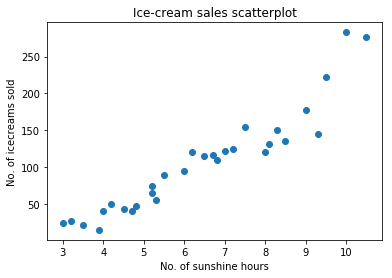

In [202]:
No_of_sunshine_hours = icecream["No. of sunshine hours"]
No_of_icecream_sold = icecream["No. of icecreams sold"]
plt.scatter(No_of_sunshine_hours,No_of_icecream_sold)
plt.title("Ice-cream sales scatterplot")
plt.xlabel("No. of sunshine hours")
plt.ylabel("No. of icecreams sold")
plt.show()

Now we will train our training dataset by linear regression algorithm. This is present in sklearn package and hence we will
import the necessary packages as coded below. Required functions are used to design the predictive model.

For more details and documentaton visit: https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares

In [203]:
from sklearn.linear_model import LinearRegression
reg=linear_model.LinearRegression()
model=reg.fit(x_train,y_train) # fit model to training data
model.coef_
model.intercept_
predict=reg.predict(x_train) # making prdedictions based on training model
predict

array([[ 45.10688632],
       [188.6727782 ],
       [ 92.96218361],
       [156.76924667],
       [115.29465568],
       [118.48500884],
       [220.57630972],
       [ 25.96476741],
       [ 51.48759263],
       [  3.63229534],
       [ 35.53582687],
       [140.81748091],
       [236.52807549],
       [ 54.67794578],
       [124.86571514],
       [ 77.01041785],
       [166.34030613],
       [159.95959982],
       [108.91394938],
       [198.24383766],
       [ 29.15512056]])

In [204]:
model.coef_ # This defines the value of slope/gradient of linear regression which is of the form of y = mx + c

array([[31.90353153]])

In [205]:
model.intercept_ # This defines the value of intercept of linear regression which is of the form of y = mx + c

array([-98.45900555])

We will now plot the regression line using the following piece of code. Note that the red straight line is the fitting line
which is formed by training the model.

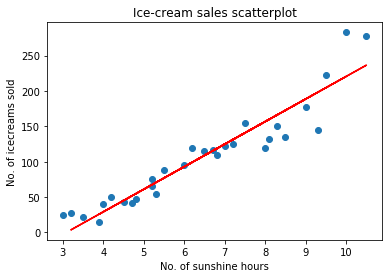

In [206]:
No_of_sunshine_hours = icecream["No. of sunshine hours"]
No_of_icecream_sold = icecream["No. of icecreams sold"]
plt.scatter(No_of_sunshine_hours,No_of_icecream_sold)
plt.plot(x_train, reg.predict(x_train), color = 'red')
plt.title("Ice-cream sales scatterplot")
plt.xlabel("No. of sunshine hours")
plt.ylabel("No. of icecreams sold")
plt.show()

In [207]:
y_pred = reg.predict(x_test) # Predicts results on testing set based on the learning from training model

In [208]:
y_pred

array([[131.24642145],
       [ 70.62971155],
       [ 13.2033548 ],
       [ 67.43935839],
       [172.72101243],
       [204.62454396],
       [ 67.43935839],
       [ 99.34288992],
       [ -2.74841097]])

In [209]:
y_test # Shows the actual test data

array([[125],
       [ 55],
       [ 22],
       [ 65],
       [135],
       [222],
       [ 75],
       [120],
       [ 25]], dtype=int64)

Lets calculate the accuracy of the model, we will use RMSE to find the error value. To do that we will require the package
metrics from sklearn.

In [210]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

19.27944259586728


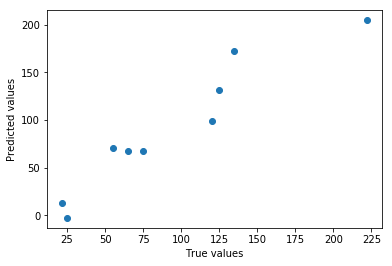

In [211]:
plt.scatter(y_test,y_pred)
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.show()